In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 

In [4]:
df1=pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df=df1.copy()
df=df.drop(columns=['MachineID', 'SignatureVersion', 'OSBuildLab', 'NumericOSVersion', 'DateAS', 'DateOS'])

In [5]:
df.head()

,ProductName,EngineVersion,AppVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
0,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,0
1,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,1
2,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,1
3,win8defender,1.1.15200.1,4.12.17007.18011,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,1
4,win8defender,1.1.15200.1,4.13.17134.228,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,0


In [6]:
mode = [
    'SMode', 'IsGamer', 'InternalBatteryNumberOfCharges', 'IsFlightsDisabled',
    'FirewallEnabled', 'TotalPhysicalRAMMB', 'IsAlwaysOnAlwaysConnectedCapable',
    'OSInstallLanguageID', 'SystemVolumeCapacityMB', 'IEVersionID', 'ProcessorManufacturerID',
    'ProcessorCoreCount', 'NumAntivirusProductsEnabled', 'AntivirusConfigID',
    'NumAntivirusProductsInstalled', 'IsSystemProtected', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionVertical',
    'RealTimeProtectionState', 'PrimaryDiskType', 'IsVirtualDevice', 'EnableLUA', 'ChassisType'
]

knn = [
    'CityID', 'RegionIdentifier', 'FirmwareManufacturerID', 'FirmwareVersionID',
    'OEMModelID', 'OEMNameID', 'PrimaryDiskCapacityMB', 'ProcessorModelID'
]

binary = ['ProductName', 'DeviceFamily']

nominal = [
    'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'ChassisType', 'PowerPlatformRole',
    'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
    'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
    'FlightRing', 'PrimaryDiskType'
]

ordinal = ['EngineVersion', 'AppVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease']

ignore = ['MachineID', 'SignatureVersion', 'OSBuildLab', 'NumericalOSVersion', 'DateAS', 'DateOS']

In [7]:
x=df.drop('target',axis=1)
y=df['target']

In [8]:
x_train ,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
si_mean=SimpleImputer(strategy='mean')
si_mode=SimpleImputer(strategy='most_frequent')
si_knn=KNNImputer()

In [11]:
trf1=ColumnTransformer([
    ('si_mode', SimpleImputer(strategy='most_frequent'),[4,6,7,8,21,23,24,25,26,31,32,35,36,38,39,40,41,42,44,52,58,63,66,67]),
    ('si_knn', KNNImputer(),[11,29,30,33,34,60,61,68])
], remainder='passthrough')



In [12]:
trf2=ColumnTransformer([
    ('onehotencoding',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,14,15,16,19,20,27,28,35,39,43,45,46,49,50,51,54,56,57,59]),
    
], remainder='passthrough')

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

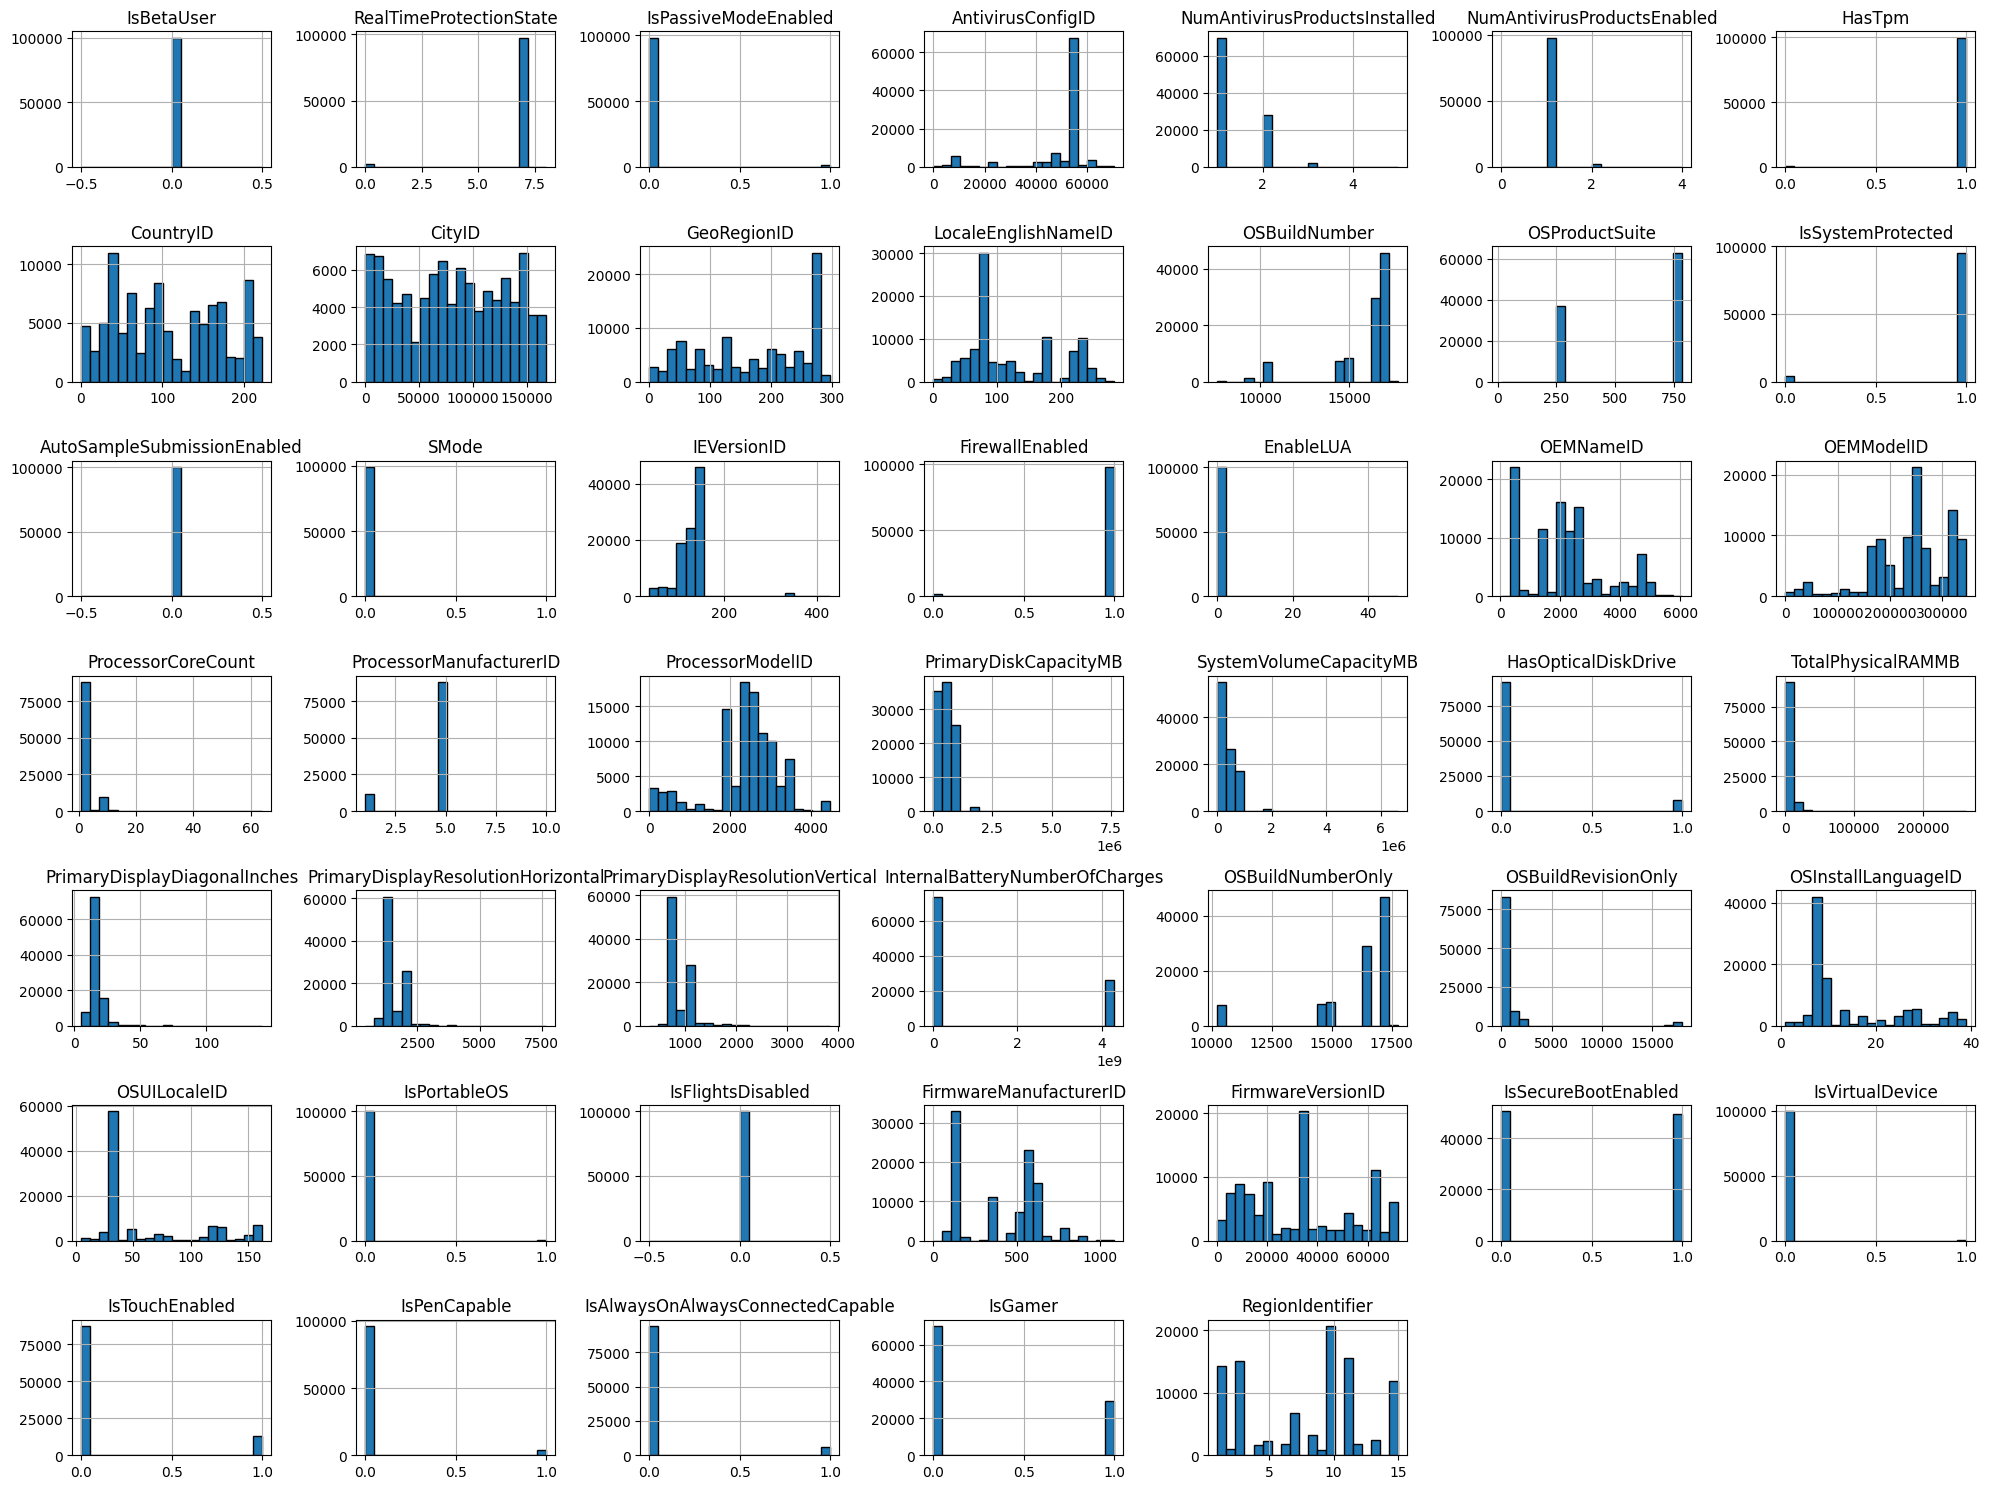

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your columns
columns = ['ProductName', 'EngineVersion', 'AppVersion', 'IsBetaUser',
       'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'SKUEditionName',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor',
       'DeviceFamily', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
       'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB',
       'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'OSArchitecture', 'OSBranch',
       'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition',
       'OSSkuFriendlyName', 'OSInstallType', 'OSInstallLanguageID',
       'OSUILocaleID', 'AutoUpdateOptionsName', 'IsPortableOS',
       'OSGenuineState', 'LicenseActivationChannel', 'IsFlightsDisabled',
       'FlightRing', 'FirmwareManufacturerID', 'FirmwareVersionID',
       'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
       'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',
       'RegionIdentifier']

# Plot histograms for all specified columns
df[columns].hist(bins=20, figsize=(20, 15), edgecolor='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()





In [10]:
columns = ['ProductName', 'EngineVersion', 'AppVersion', 'IsBetaUser',
       'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'SKUEditionName',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor',
       'DeviceFamily', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
       'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB',
       'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'OSArchitecture', 'OSBranch',
       'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition',
       'OSSkuFriendlyName', 'OSInstallType', 'OSInstallLanguageID',
       'OSUILocaleID', 'AutoUpdateOptionsName', 'IsPortableOS',
       'OSGenuineState', 'LicenseActivationChannel', 'IsFlightsDisabled',
       'FlightRing', 'FirmwareManufacturerID', 'FirmwareVersionID',
       'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
       'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',
       'RegionIdentifier']

import pandas as pd

# Example: Original dataset columns
original_columns = ['MachineID', 'SMode', 'FirewallEnabled', 'ProcessorCoreCount', 
                    'CityID', 'PrimaryDiskType', 'OSVersion', 'ChassisType']  # Example list

# Your mode list
mode = [
    'SMode', 'IsGamer', 'InternalBatteryNumberOfCharges', 'IsFlightsDisabled',
    'FirewallEnabled', 'TotalPhysicalRAMMB', 'IsAlwaysOnAlwaysConnectedCapable',
    'OSInstallLanguageID', 'SystemVolumeCapacityMB', 'IEVersionID', 'ProcessorManufacturerID',
    'ProcessorCoreCount', 'NumAntivirusProductsEnabled', 'AntivirusConfigID',
    'NumAntivirusProductsInstalled', 'IsSystemProtected', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionVertical',
    'RealTimeProtectionState', 'PrimaryDiskType', 'IsVirtualDevice', 'EnableLUA', 'ChassisType'
]

# Find index positions
mode_indices = {col: columns.index(col) for col in mode if col in columns}
knn_indices = {col: columns.index(col) for col in knn if col in columns}
binary_indices = {col: columns.index(col) for col in binary if col in columns}
nominal_indices = {col: columns.index(col) for col in nominal if col in columns}
ordinal_indices = {col: columns.index(col) for col in ordinal if col in columns}

# Sorting dictionary by values (index positions)
sorted_mode_indices = dict(sorted(mode_indices.items(), key=lambda item: item[1]))
sorted_knn_indices = dict(sorted(knn_indices.items(), key=lambda item: item[1]))
sorted_binary_indices = dict(sorted(binary_indices.items(), key=lambda item: item[1]))
sorted_nominal_indices = dict(sorted(nominal_indices.items(), key=lambda item: item[1]))
sorted_ordinal_indices = dict(sorted(ordinal_indices.items(), key=lambda item: item[1]))



In [20]:
x_train.columns

Index(['ProductName', 'EngineVersion', 'AppVersion', 'IsBetaUser',
       'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'SKUEditionName',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor',
       'DeviceFamily', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
       'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB',
       'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatte